### Analysis = correlaciones y reducción de dimensiones por PCA. Retorno de data frame ya procesado

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
pd.options.display.float_format='{:.2f}'.format

In [4]:
coinmarketcap_data = pd.read_csv('../clean_dataframes/coinmarketcap_cleaned.csv')

In [26]:
coinmarketcap_data.head()

,Unnamed: 0,24h_volume_usd,available_supply,market_cap_usd,max_supply,name,price_btc,price_usd,rank,symbol
0,0,22081300000,16785225,284909052105,21000000.00,Bitcoin,1.00,16973.80,1,BTC
1,1,5221370000,38739144847,119207709132,100000000000.00,Ripple,0.00,3.08,2,XRP
2,2,5705690000,96803840,100115499075,NaN,Ethereum,0.06,1034.21,3,ETH
3,3,1569900000,16896225,44424061657,21000000.00,Bitcoin Cash,0.16,2629.23,4,BCH
4,4,428305000,25927070538,25916647856,45000000000.00,Cardano,0.00,1.00,5,ADA


### 1. Which are the 5 cryptocurrencies more relevants in the market?

##### To answer it let's define "relevant" as those who has a great market cap and transaction volume.

##### Plot the top cryptos with best market cap

findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['avenir'] not found. Falling back to DejaVu Sans.


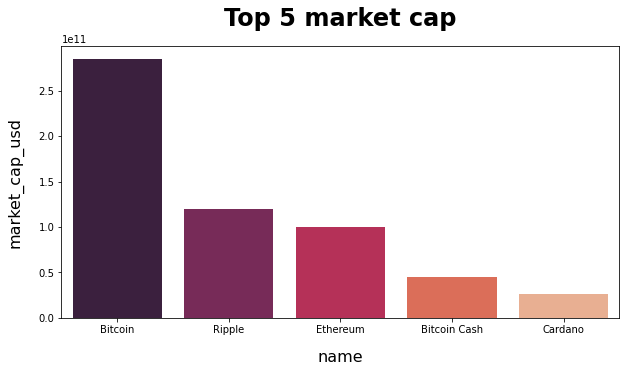

In [6]:
plt.figure(figsize=(10,5))

top_5_market_cap = coinmarketcap_data.sort_values('market_cap_usd', ascending=0)[0:5]
sns.barplot(x='name', y='market_cap_usd',palette="rocket" ,data=top_5_market_cap)

plt.title('Top 5 market cap', family='avenir', weight='bold', size=24, pad=20)
plt.xlabel('name', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('market_cap_usd', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

##### Plot the volume of those cryptos with best market cap. 

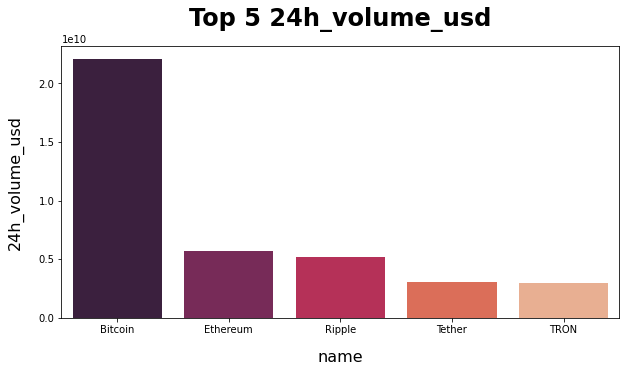

In [12]:
plt.figure(figsize=(10,5))

top_5_market_cap = coinmarketcap_data.sort_values('24h_volume_usd', ascending=0)[0:5]
sns.barplot(x='name', y='24h_volume_usd',palette="rocket" ,data=top_5_market_cap)

plt.title('Top 5 24h_volume_usd', family='avenir', weight='bold', size=24, pad=20)
plt.xlabel('name', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('24h_volume_usd', family='avenir', weight="light", size=16, labelpad=15)
plt.show()


##### Notes

- As we can see Bitcoin is so far the cryptocurrency in market and volume terms. Let's try to extract Bitcoin from the model to see in perspective the market cup in other assets.

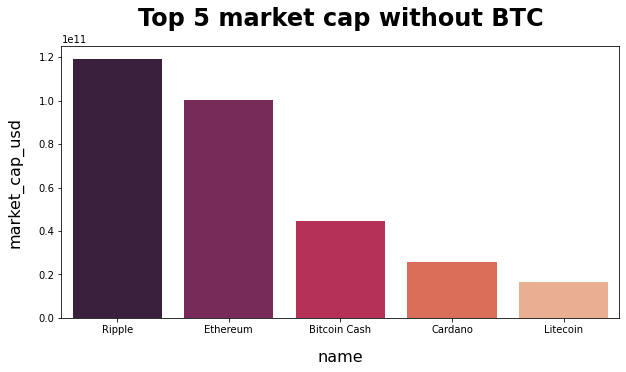

In [21]:
plt.figure(figsize=(10,5))

top_5_market_cap = coinmarketcap_data.sort_values('market_cap_usd', ascending=0)[1:6]
sns.barplot(x='name', y='market_cap_usd',palette="rocket" ,data=top_5_market_cap)

plt.title('Top 5 market cap without BTC', family='avenir', weight='bold', size=24, pad=20)
plt.xlabel('name', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('market_cap_usd', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

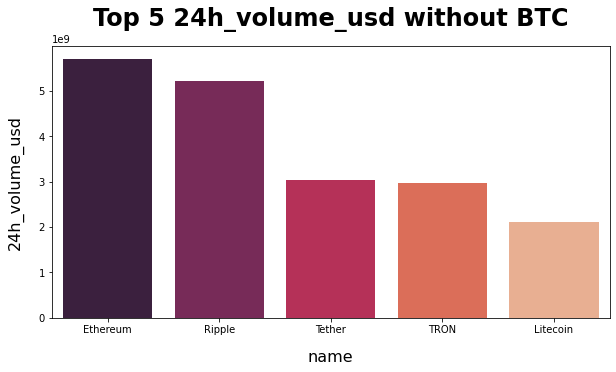

In [14]:
plt.figure(figsize=(10,5))

top_5_market_cap = coinmarketcap_data.sort_values('24h_volume_usd', ascending=0)[1:6]
sns.barplot(x='name', y='24h_volume_usd',palette="rocket" ,data=top_5_market_cap)

plt.title('Top 5 24h_volume_usd without BTC', family='avenir', weight='bold', size=24, pad=20)
plt.xlabel('name', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('24h_volume_usd', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

- We have similar comparable values from Ethereum to Litecoin. So The top market cup without bitcoin have similar values.

#### Conclusions:

- Bitcoin es la cryptomoneda indiscutible en cuanto a marketcap y volumen en USD
- Another assets have comparable values. Variation in market cup is less if we cut out bitcoin.

### 2. The market cap and cryptocurrencies volume per 24 hours are correlated?

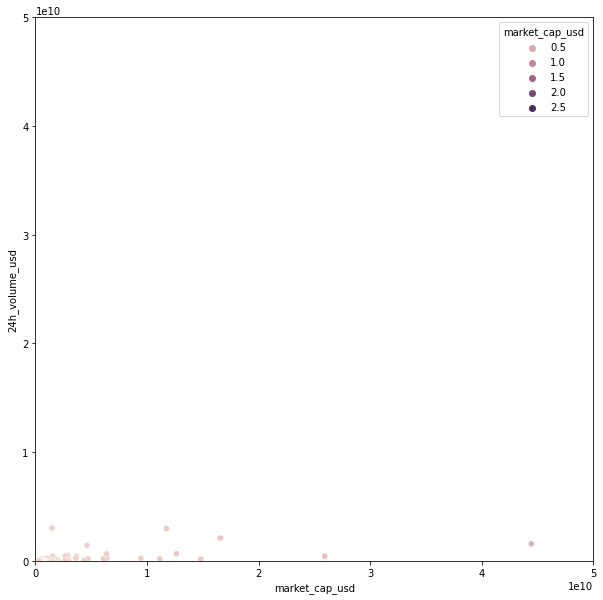

In [25]:
plt.figure(figsize=(10,10))


sns.scatterplot(x='market_cap_usd', y='24h_volume_usd',sizes=(20,200) ,hue='market_cap_usd',data=coinmarketcap_data)
plt.xlim(0,50000000000)
plt.ylim(0,50000000000)
plt.show()

- As we can see. There are some point farther in 'market_cap_usd' ax. But at the same time there are lower in '24h_volume_usd' ax.

##### Conclusion:

- Market_cap_usd and 24h_volume_usd are not correlated. And that means that give investement in some crypto to increase the market cap doesn't mean that would increase the volume in usd.

### 3. What is the crypto who has more available supply?

A crypto with available supply means that has cryptos that are not minned yet. So it could be a great business try to mine to give a reward

First we should cut off those cryptos who has no shortage. Example: Ethereum

In [65]:

cryptos_with_shortage = coinmarketcap_data[coinmarketcap_data['max_supply'].notna()]
cryptos_with_shortage.head()

,Unnamed: 0,24h_volume_usd,available_supply,market_cap_usd,max_supply,name,price_btc,price_usd,rank,symbol
0,0,22081300000,16785225,284909052105,21000000.00,Bitcoin,1.00,16973.80,1,BTC
1,1,5221370000,38739144847,119207709132,100000000000.00,Ripple,0.00,3.08,2,XRP
3,3,1569900000,16896225,44424061657,21000000.00,Bitcoin Cash,0.16,2629.23,4,BCH
4,4,428305000,25927070538,25916647856,45000000000.00,Cardano,0.00,1.00,5,ADA
5,5,2105240000,54637708,16574020942,84000000.00,Litecoin,0.02,303.34,6,LTC


##### We set a column called 'available_supply_percent'

In [64]:
cryptos_with_shortage['available_supply_percent'] = cryptos_with_shortage['available_supply']/cryptos_with_shortage['max_supply']
cryptos_with_shortage.head()

C:\Users\Augusto\AppData\Local\Temp/ipykernel_3872/791664934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cryptos_with_shortage['available_supply_percent'] = cryptos_with_shortage['available_supply']/cryptos_with_shortage['max_supply']


,Unnamed: 0,24h_volume_usd,available_supply,market_cap_usd,max_supply,name,price_btc,price_usd,rank,symbol,available_supply_percent
0,0,22081300000,16785225,284909052105,21000000.00,Bitcoin,1.00,16973.80,1,BTC,0.80
1,1,5221370000,38739144847,119207709132,100000000000.00,Ripple,0.00,3.08,2,XRP,0.39
3,3,1569900000,16896225,44424061657,21000000.00,Bitcoin Cash,0.16,2629.23,4,BCH,0.80
4,4,428305000,25927070538,25916647856,45000000000.00,Cardano,0.00,1.00,5,ADA,0.58
5,5,2105240000,54637708,16574020942,84000000.00,Litecoin,0.02,303.34,6,LTC,0.65


##### Plot the top 5 cryptos with more % of available supply from max_supply

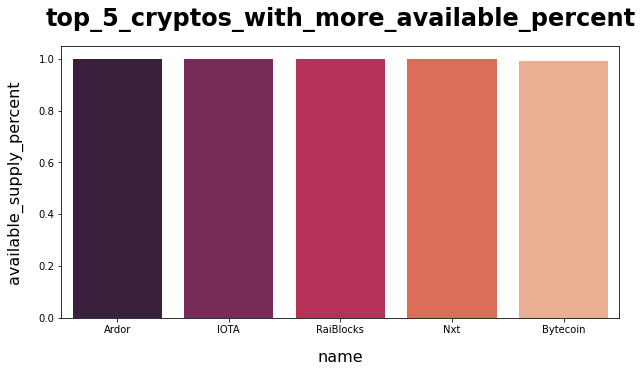

In [62]:

plt.figure(figsize=(10,5))

top_5_available_supply = cryptos_with_shortage.sort_values('available_supply_percent', ascending=0)[0:5]
sns.barplot(x='name', y='available_supply_percent',palette="rocket" ,data=top_5_available_supply)

plt.title('top_5_cryptos_with_more_available_percent', family='avenir', weight='bold', size=24, pad=20)
plt.xlabel('name', family='avenir', weight="light", size=16, labelpad=15)
plt.ylabel('available_supply_percent', family='avenir', weight="light", size=16, labelpad=15)
plt.show()

#### Notes

- A note

### Lab

<AxesSubplot:>

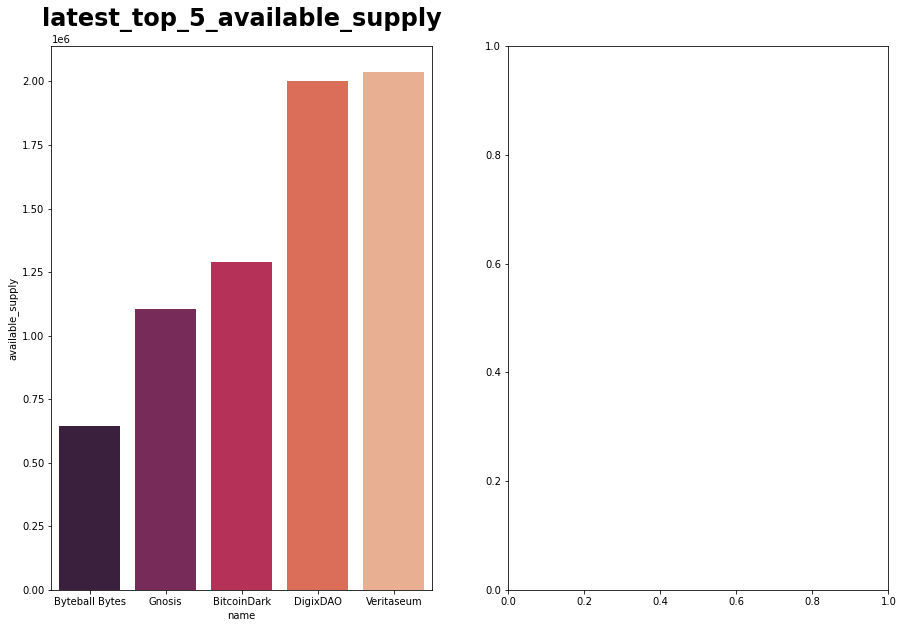

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)

plt.title('latest_top_5_available_supply', family='avenir', weight="bold", size=24, pad=20)
sns.barplot(x='name',y='available_supply',palette="rocket",data=coinmarketcap_data.sort_values('available_supply')[0:5])

plt.subplot(1, 2, 2)

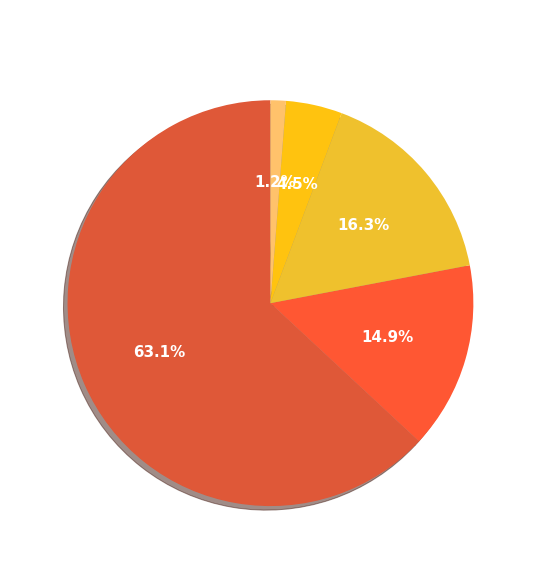

In [63]:
pie_crypto_volume = {coinmarketcap_data['name'][i]: coinmarketcap_data['24h_volume_usd'][i] for i in range(5)}

plt.figure(figsize=(20,20))

color= ['#DF5838', '#FF5733','#EFC12D', '#FFC30F', '#FFC26B']

plt.subplot(1, 2, 1)


tp = { 'weight': 'bold', 'color': 'white', 'size': '15'}
plt.title('% volume by currency', family='avenir', weight="bold",color="white" ,size=30, pad=20)
plt.pie(pie_crypto_volume.values(),startangle=90, textprops=tp ,labels=pie_crypto_volume.keys(), autopct='%1.1f%%',
        shadow=True, colors=color)

plt.show()